In [1]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from numpy import angle, max, pi, sin, zeros
import matplotlib

In [12]:
%matplotlib inline

In [3]:
data = np.hstack((np.array(range(10))[:,np.newaxis]))

In [4]:
N = 256
data = np.linspace(0,1,N)[np.newaxis,:]
theta = np.linspace(0, 2*np.pi, N)

In [5]:
def plot_clock(ax):
    ax.set_yticklabels([])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks([0, np.pi/2, np.pi, np.pi * 3/2])
    ax.set_xticklabels([12, 3, 6, 9])
    return ax

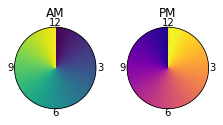

In [20]:
def plot_clocks(cmap='hsv'):
    fig = figure(figsize=(3.7, 1.5))
    ax = fig.add_subplot(121, polar=True)
    ax.pcolormesh(theta,[0,1], data, cmap=cmap, vmin=0, vmax=2)
    ax = plot_clock(ax)
    ax.set_title('AM')
    ax = fig.add_subplot(122, polar=True)
    ax.pcolormesh(theta,[0,1], data + 1, cmap=cmap, vmin=0, vmax=2)
    ax = plot_clock(ax)
    ax.set_title('PM')
    
    return fig
colors = np.vstack((plt.cm.viridis.colors, np.flipud(plt.cm.plasma.colors)[:250]))
cmap = matplotlib.colors.ListedColormap(colors)
_ = plot_clocks(cmap=cmap)

So start with almost black in the middle of the night 2am and then into pink for sunrise 6am then into blue for day then into orange and then into purple for night

In [7]:
np.array(plt.cm.plasma.colors).shape

(256, 3)

In [8]:
np.array(plt.cm.viridis.colors).shape

(256, 3)

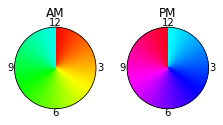

In [93]:
fig = figure(figsize=(3.7, 1.5))
ax = fig.add_subplot(121, polar=True)
ax.pcolormesh(theta,[0,1], data, cmap='hsv', vmin=0, vmax=2)
ax = plot_clock(ax)
ax.set_title('AM')
ax = fig.add_subplot(122, polar=True)
ax.pcolormesh(theta,[0,1], data + 1, cmap='hsv', vmin=0, vmax=2)
ax = plot_clock(ax)
ax.set_title('PM')

[]

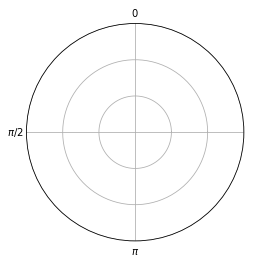

In [14]:
def complex_to_rgb(complex_data, invert=False):
    phase = angle(complex_data)
    amplitude = abs(complex_data)
    amplitude = amplitude/max(max(amplitude))
    A = zeros((complex_data.shape[0], complex_data.shape[1], 3))
    A[:,:,0] = .5*(sin(phase)+1)*amplitude
    A[:,:,1] = .5*(sin(phase+pi/2)+1)*amplitude
    A[:,:,2] = .5*(-sin(phase)+1)*amplitude
    if(invert):
        return 1-A
    else:
        return A

N = 1024
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

X,Y = np.meshgrid(x,y)

R = np.sqrt(X*X + Y*Y)
PHI = np.arctan2(Y, X)

fig = figure()
ax = fig.add_subplot(111, polar=True)

ax.imshow(complex_to_rgb(R*np.exp(1j*PHI)  * (R<1), invert=True), extent=(0, 2*np.pi, 0, 1024))

ax.set_xticks([ 0, np.pi/2, np.pi, 3*np.pi/2])#-.5)
ax.set_yticks([0, N/3, 2*N/3, N])

ax.set_xticklabels(['', '$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$'])
ax.set_yticklabels([])


In [13]:
!conda upgrade matplotlib -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /anaconda:

The following packages will be UPDATED:

    anaconda:   4.4.0-np112py36_0 --> custom-py36_0            
    freetype:   2.5.5-2           --> 2.7-1         conda-forge
    libpng:     1.6.27-0          --> 1.6.28-1      conda-forge
    matplotlib: 2.0.2-np112py36_0 --> 2.0.2-py36_2  conda-forge
    pillow:     4.1.1-py36_0      --> 4.2.1-py36_1  conda-forge

libpng-1.6.28- 100% |################################| Time: 0:00:00 444.80 kB/s
anaconda-custo 100% |################################| Time: 0:00:00   2.89 MB/s
freetype-2.7-1 100% |################################| Time: 0:00:00 946.71 kB/s
pillow-4.2.1-p 100% |################################| Time: 0:00:00 722.57 kB/s
matplotlib-2.0 100% |################################| Time: 0:00:06   1.13 MB/s


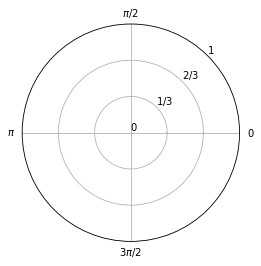

In [7]:
def complex_to_rgb(complex_data, invert=False):
  from numpy import angle, max, pi, sin, zeros
  phase = angle(complex_data)
  amplitude = abs(complex_data)
  amplitude = amplitude/max(max(amplitude))
  A = zeros((complex_data.shape[0], complex_data.shape[1], 3))
  A[:,:,0] = .5*(sin(phase)+1)*amplitude
  A[:,:,1] = .5*(sin(phase+pi/2)+1)*amplitude
  A[:,:,2] = .5*(-sin(phase)+1)*amplitude
  if(invert):
    return 1-A
  else:
    return A

import numpy as np
from matplotlib.pyplot import figure

N = 1024
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

X,Y = np.meshgrid(x,y)

R = np.sqrt(X*X + Y*Y)
PHI = np.arctan2(Y, X)

fig = figure()
ax = fig.add_subplot(111, polar=True)

ax.imshow(complex_to_rgb(R*np.exp(1j*PHI)  * (R<1), invert=True), extent=[0,2*np.pi, 0,1024])

ax.set_rgrids([1,N/3,2*N/3], angle=45)
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax.set_yticks([0, N/3, 2*N/3, N])

ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$'])
ax.set_yticklabels([r'0', r'$1/3$', r'$2/3$', '1'])